In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


In [ ]:

summary_file = "results/experiment_summary_2025-06-07_10-26-50.csv"

# Load CSV
df = pd.read_csv(summary_file)

# Convert timestamps to datetime
timestamp_cols = [
    "introspection_created",
    "introspection_running",
    "introspection_finished",
    "execution_created",
    "execution_running",
    "execution_finished"
]
for col in timestamp_cols:
    if "introspection" in col or "execution" in col:
        df[col] = pd.to_datetime(df[col])


In [5]:
# Compute introspection-to-execution lag (in seconds)
df["time_lag_sec"] = (df["execution_created"] - df["introspection_finished"]).dt.total_seconds()


In [6]:

# Parse the execution_counts JSON strings
df["parsed_counts"] = df["execution_counts"].apply(lambda x: json.loads(x.replace('""', '"')))

# Compute fidelity to Φ⁺ = (|00> + |11>)/√2 ⇒ ideal is 50% "00" and 50% "11"
df["phi_plus_quality"] = df["parsed_counts"].apply(
    lambda counts: (counts.get("00", 0) + counts.get("11", 0)) / 1024
)

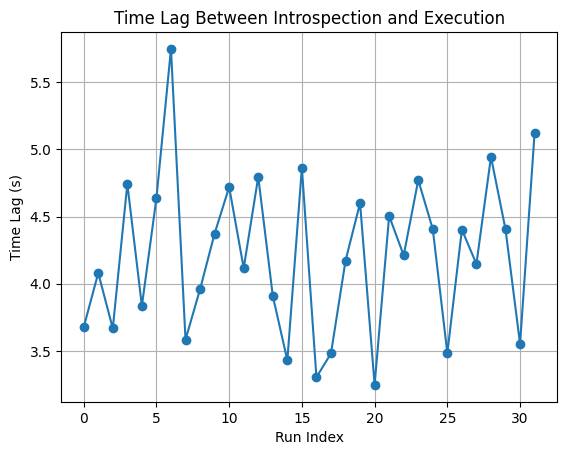

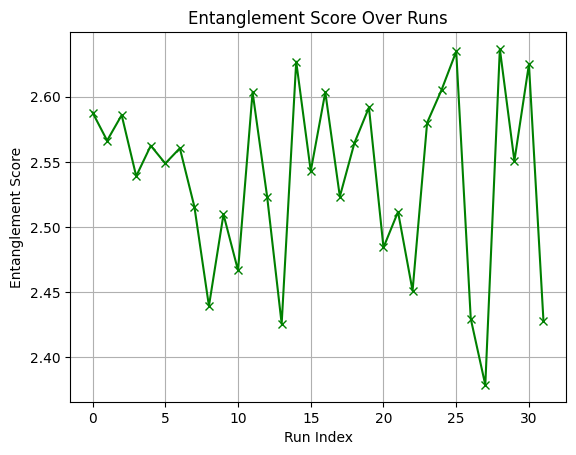

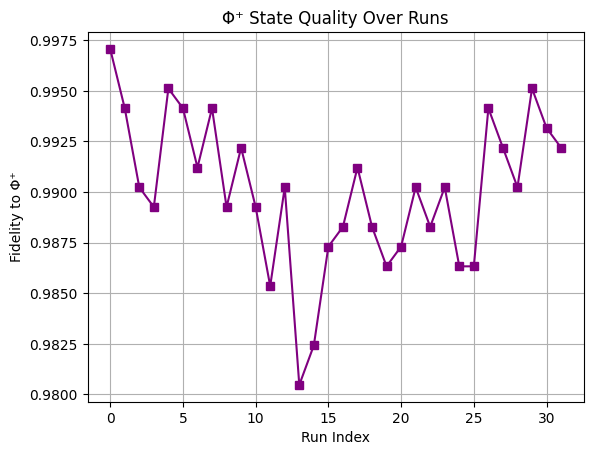

In [8]:
# Plot time lag over runs
plt.figure()
plt.plot(df["time_lag_sec"], marker='o')
plt.title("Time Lag Between Introspection and Execution")
plt.ylabel("Time Lag (s)")
plt.xlabel("Run Index")
plt.grid(True)
plt.show()

# Plot entanglement score
plt.figure()
plt.plot(df["entanglement_score"], marker='x', color='green')
plt.title("Entanglement Score Over Runs")
plt.ylabel("Entanglement Score")
plt.xlabel("Run Index")
plt.grid(True)
plt.show()

# Plot Φ⁺ state quality
plt.figure()
plt.plot(df["phi_plus_quality"], marker='s', color='purple')
plt.title("Φ⁺ State Quality Over Runs")
plt.ylabel("Fidelity to Φ⁺")
plt.xlabel("Run Index")
plt.grid(True)
plt.show()


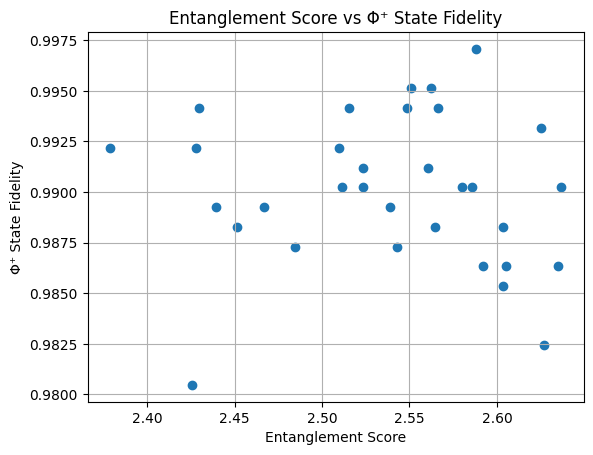

Pearson correlation between entanglement score and Φ⁺ fidelity: -0.078


In [9]:
# Scatter plot: Entanglement score vs Phi plus fidelity
plt.figure()
plt.scatter(df["entanglement_score"], df["phi_plus_quality"])
plt.title("Entanglement Score vs Φ⁺ State Fidelity")
plt.xlabel("Entanglement Score")
plt.ylabel("Φ⁺ State Fidelity")
plt.grid(True)
plt.show()

# Compute Pearson correlation
correlation = df[["entanglement_score", "phi_plus_quality"]].corr().iloc[0, 1]
print(f"Pearson correlation between entanglement score and Φ⁺ fidelity: {correlation:.3f}")
